In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio
from scipy import signal

import mne
from mne.datasets.sleep_physionet.age import fetch_data

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer

In [2]:
ALICE, BOB = 0, 1

[alice_files, bob_files] = fetch_data(subjects=[ALICE, BOB], recording=[1])

raw_train = mne.io.read_raw_edf(alice_files[0], stim_channel='Event marker',
                                misc=['Temp rectal'], preload=True)
annot_train = mne.read_annotations(alice_files[1])

raw_train.set_annotations(annot_train, emit_warning=False)

# raw_train.plot(start=60, duration=60,
#                scalings=dict(eeg=1e-4, resp=1e3, eog=1e-4, emg=1e-7,
#                              misc=1e-1))

Using default location ~/mne_data for PHYSIONET_SLEEP...
Extracting EDF parameters from C:\Users\fiji4\mne_data\physionet-sleep-data\SC4001E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 7949999  =      0.000 ... 79499.990 secs...


<RawEDF | SC4001E0-PSG.edf, 7 x 7950000 (79500.0 s), ~424.6 MB, data loaded>

In [3]:
signalData,samplingFrequency = raw_train.get_data()[0], raw_train.info['sfreq']


In [4]:
from bandpass import BandPassFilter as bp
import wave

winnie_file = wave.open("winniethepooh.wav")
nframes = winnie_file.getnframes()
winnie_signal = np.frombuffer(winnie_file.readframes(nframes), dtype = np.int16)
winnie_signal = winnie_signal.astype(float)
framerate = winnie_file.getframerate()
winnieFFT = np.fft.rfft(winnie_signal)


groundTruth = mne.filter.filter_data(winnie_signal,framerate,300,3400)
myVersion = bp.filtering(winnie_signal,300,3400,framerate)
print(groundTruth.size)
print(myVersion.size)

winnie_Aud = Audio(data = groundTruth, rate = framerate)
winnie_Aud

Setting up band-pass filter from 3e+02 - 3.4e+03 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 300.00
- Lower transition bandwidth: 75.00 Hz (-6 dB cutoff frequency: 262.50 Hz)
- Upper passband edge: 3400.00 Hz
- Upper transition bandwidth: 850.00 Hz (-6 dB cutoff frequency: 3825.00 Hz)
- Filter length: 1941 samples (0.044 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


2116800
2116800


In [ ]:
winnie_Aud = Audio(data = myVersion, rate = framerate)
winnie_Aud

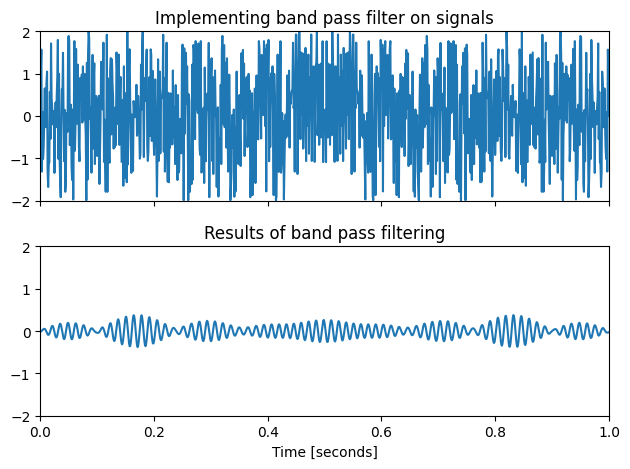

In [15]:
initSine = np.arange(1000)
k = (100*np.pi*2)
signalParams = np.linspace(0,1,1000)
sineWave1 = np.sin(k*initSine*signalParams)
l = (70*np.pi*2)
sineWave2 = np.sin(l*initSine*signalParams)
combinedSines = sineWave1 + sineWave2

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(signalParams, combinedSines)
ax1.set_title('Implementing band pass filter on signals')
ax1.axis([0, 1, -2, 2])

newSignal = bp.filtering(combinedSines,70,80,1000)

ax2.plot(signalParams,newSignal)
ax2.set_title('Results of band pass filtering')
ax2.axis([0, 1, -2, 2])
ax2.set_xlabel('Time [seconds]')
plt.tight_layout()
plt.show()